# Customer Segmentation Using K-Means Clustering

## Objective
The objective of this project is to segment customers based on their
annual income and spending behavior using unsupervised learning techniques.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## to filter out warnings
warnings.filterwarnings("ignore")


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("Mall_Customers.csv") ## load Data-set
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe() ## check basics stats

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


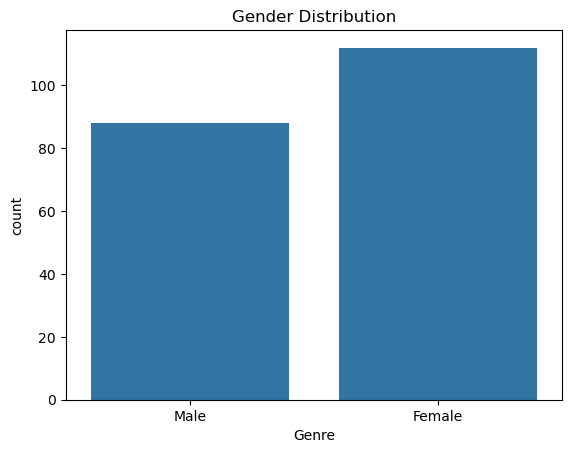

In [5]:
sns.countplot(x='Genre', data=df)
plt.title("Gender Distribution")
plt.show()


## Customers show varying spending behavior across income levels.

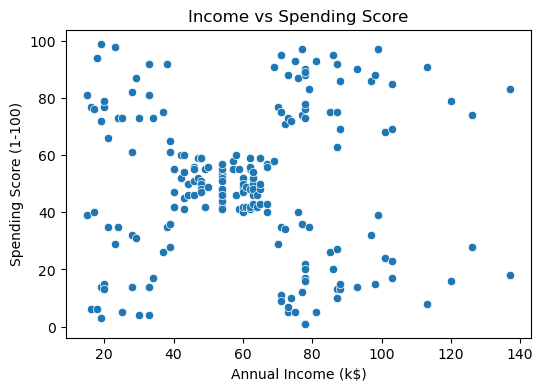

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()


## Feature Selection

We will cluster based on:

Annual Income

Spending Score

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Elbow Method
The Elbow Method was used to determine the optimal number of clusters.
WCSS values were calculated for different values of K, and the elbow point
indicated that 5 clusters provide an optimal segmentation.


In [9]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


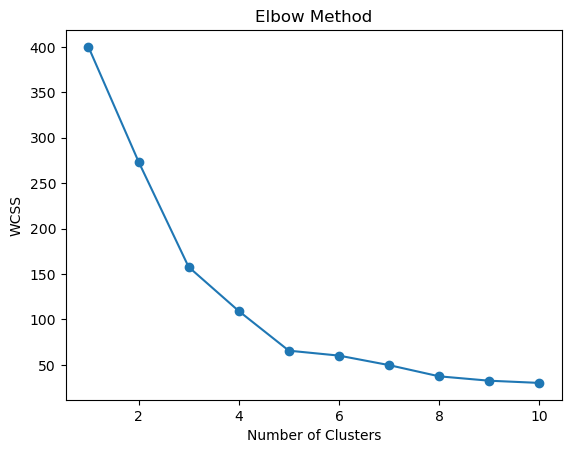

In [10]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


In [12]:
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


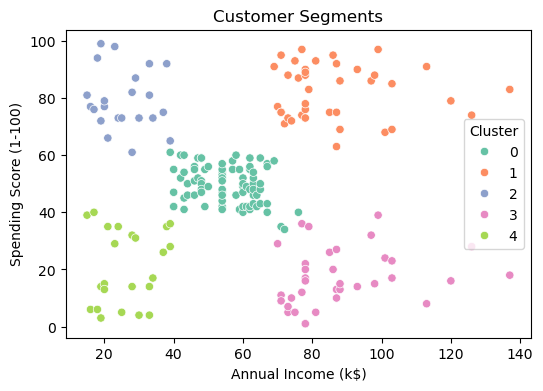

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    data=df
)
plt.title("Customer Segments")
plt.show()


In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]


### Cluster Insights & Marketing Strategies

- Cluster 0: High income, high spending  
  Strategy: Premium products, loyalty programs

- Cluster 1: Low income, low spending  
  Strategy: Discounts and budget-friendly offers

- Cluster 2: High income, low spending  
  Strategy: Personalized promotions to increase engagement

- Cluster 3: Low income, high spending  
  Strategy: Value bundles and installment offers

- Cluster 4: Average income and spending  
  Strategy: Standard marketing campaigns


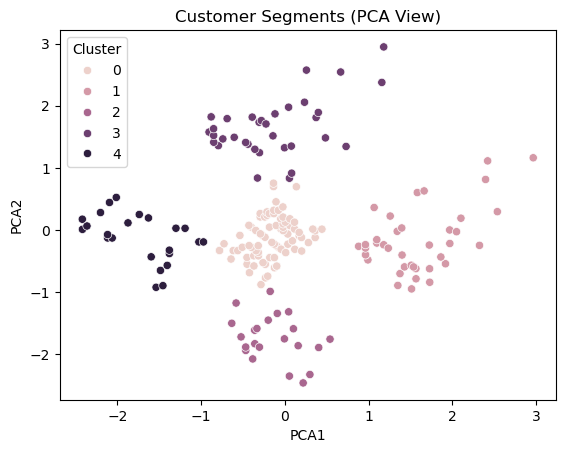

In [15]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df)
plt.title("Customer Segments (PCA View)")
plt.show()


## Conclusion
K-Means clustering successfully segmented customers into distinct groups.
These insights can help businesses design targeted marketing strategies
and improve customer engagement.


In [ ]:
The below line of code is just to .csv

In [17]:
df['Cluster'] = kmeans.labels_
df.to_csv("task2_clustered_data_output.csv", index=False)
